In [4]:
from __future__ import division, print_function
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('C:/Users/Len/Downloads/DATA-ANALYSYS_2-master (1)/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', delimiter=',')
data.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [6]:
mean = data.mean()
data = data.fillna(mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [8]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11].astype('float64')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
arr_trees = [i for i in range(1, 302, 10)]

In [14]:
temp_test_acc = pd.DataFrame(columns=['ntree', 'score'])
for ntrees in arr_trees:
    rfc = BaggingClassifier(n_estimators=ntrees, n_jobs=-1, oob_score=True)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'ntree': ntrees, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
print(temp_test_acc)

    ntree     score
0     1.0  0.709765
1    11.0  0.771711
2    21.0  0.778161
3    31.0  0.772761
4    41.0  0.776661
5    51.0  0.777111
6    61.0  0.779511
7    71.0  0.777561
8    81.0  0.780261
9    91.0  0.780861
10  101.0  0.779961
11  111.0  0.779511
12  121.0  0.781161
13  131.0  0.779511
14  141.0  0.779961
15  151.0  0.779061
16  161.0  0.777111
17  171.0  0.780861
18  181.0  0.781161
19  191.0  0.779061
20  201.0  0.779811
21  211.0  0.780861
22  221.0  0.779961
23  231.0  0.777411
24  241.0  0.780711
25  251.0  0.779661
26  261.0  0.778761
27  271.0  0.777111
28  281.0  0.780411
29  291.0  0.779061
30  301.0  0.781161


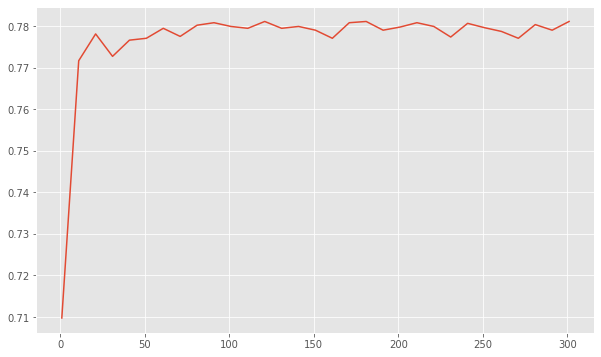

In [15]:
plt.plot(temp_test_acc['ntree'], temp_test_acc['score'])

Можно заметить, что начиная с количества деревьев, равного 21, точность варьируется мужду отметок 0.77 и 0.78, из чего приходим к выводу, что оптимальное число деревьев - 21.

    sample     score
0      1.0  0.752512
1      2.0  0.752512
2      3.0  0.752512
3      4.0  0.752512
4      5.0  0.757012
5      6.0  0.783711
6      7.0  0.753712
7      8.0  0.776511
8      9.0  0.781611
9     10.0  0.781161
10    11.0  0.782811
11    12.0  0.791960
12    13.0  0.790310
13    14.0  0.795860
14    15.0  0.789861
15    16.0  0.794810
16    17.0  0.790910
17    18.0  0.787911
18    19.0  0.792860
19    20.0  0.789261
20    21.0  0.793610
21    22.0  0.796460
22    23.0  0.787911
23    24.0  0.793010
24    25.0  0.800060
25    26.0  0.800510
26    27.0  0.799310
27    28.0  0.799160
28    29.0  0.801410


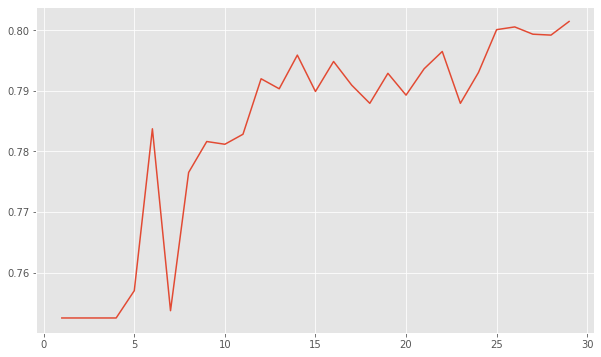

In [25]:
arr = [i for i in range(1, 30)]

temp_test_acc = pd.DataFrame(columns=['sample', 'score'])
for max_samples in arr:
    rfc = BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, max_samples=max_samples)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'sample': max_samples, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
    
plt.plot(temp_test_acc['sample'], temp_test_acc['score'])
print(temp_test_acc)

Видно, что с увеличением размера выборки точность повышается.